In [2]:
import pandas as pd
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
stock_list=['FB','GOOG','MS','GDX','USO']

/Users/thomas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


Best Day: 1
Best Auto Correlation: 0.996494686975


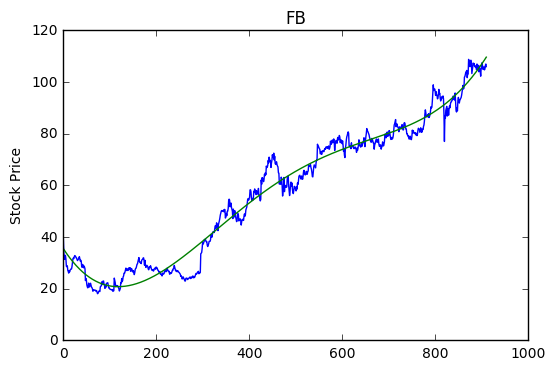

Best Day: 1
Best Auto Correlation: 0.982608264757


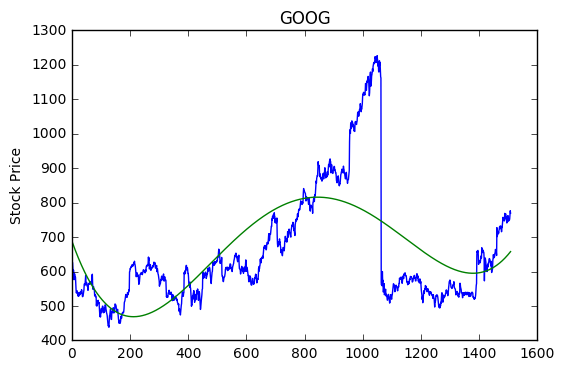

Best Day: 1
Best Auto Correlation: 0.992809217814


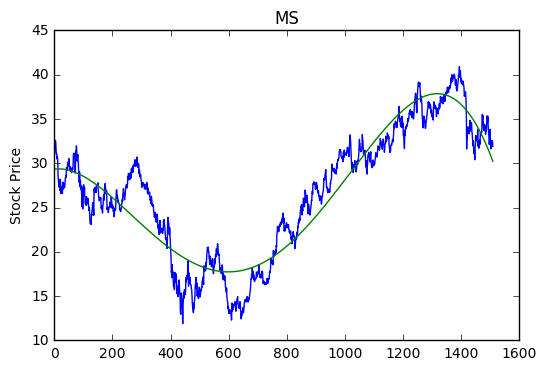

Best Day: 1
Best Auto Correlation: 0.99585742266


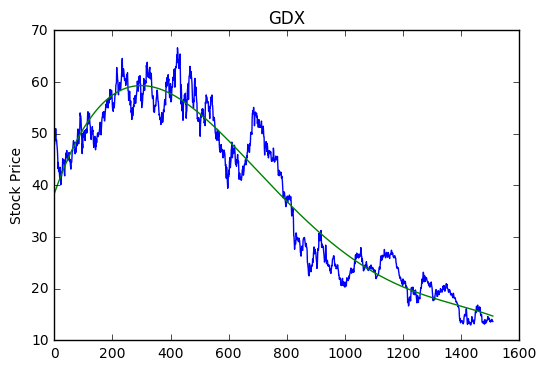

Best Day: 1
Best Auto Correlation: 0.991952931011


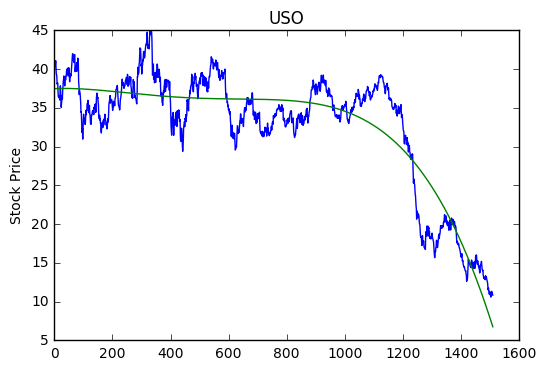

In [62]:
for stock in stock_list:
    df = web.DataReader(stock, 'yahoo', datetime.datetime(2010, 01, 01), datetime.datetime(2015, 12, 31))
    best_auto=0
    best_day=0
    for day in range(1,52):
        auto=df['Open'].resample('W', how='mean').autocorr(lag=day)
        if auto>best_auto:
            best_day=day
            best_auto=auto
    print "Best Day:",best_day
    print "Best Auto Correlation:",best_auto
    trend=np.polyfit(range(len(df['Open'])),df['Open'],4)
    model=np.poly1d(trend)
    plt.plot(range(len(df['Open'])),df['Open'],label=stock)
#     plt.legend()
    plt.plot(range(len(df['Open'])),model(range(len(df['Open']))))
    plt.ylabel('Stock Price')
    plt.title(stock)
    plt.show()

In [44]:
df=df.dropna()